# Inteligencia Artificial
# Clase 10 - Callbacks y Sklearn Wrappers

## Optimizando hiperparátremos con `GridSearchCV`

Ya hemos trabajado con distintos casos simples de aplicación de redes neuronales a problemas de regresión y clasificación. Como en todo modelo de *machine learning*, el desempeño de una red depende en gran parte de la configuración de sus hiperparámetros. Sabemos que el tamaño de la arquitectura, la *learning rate* y los hiperparámetros propios de las distintas técnicas de regularización que podemos aplicar son aspectos importantes a considerar para obtener buenos resultados con modelos de *deep learning*. En esta notebook, exploraremos cómo podemos integrar a un flujo de trabajo con Keras `GridSearchCV`, la clase provista por Scikit - Learn para optimización de hiperparámetros. Veremos cómo sistematizar la elección de cantidad de neuronas en una red con una capa oculta y su *dropout rate*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Para ejemplificar, continuaremos trabajando con el dataset [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist).

In [2]:
# Cargamos el dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Evaluamos las shapes de train y test
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Especificamos los nombres de cada clase
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

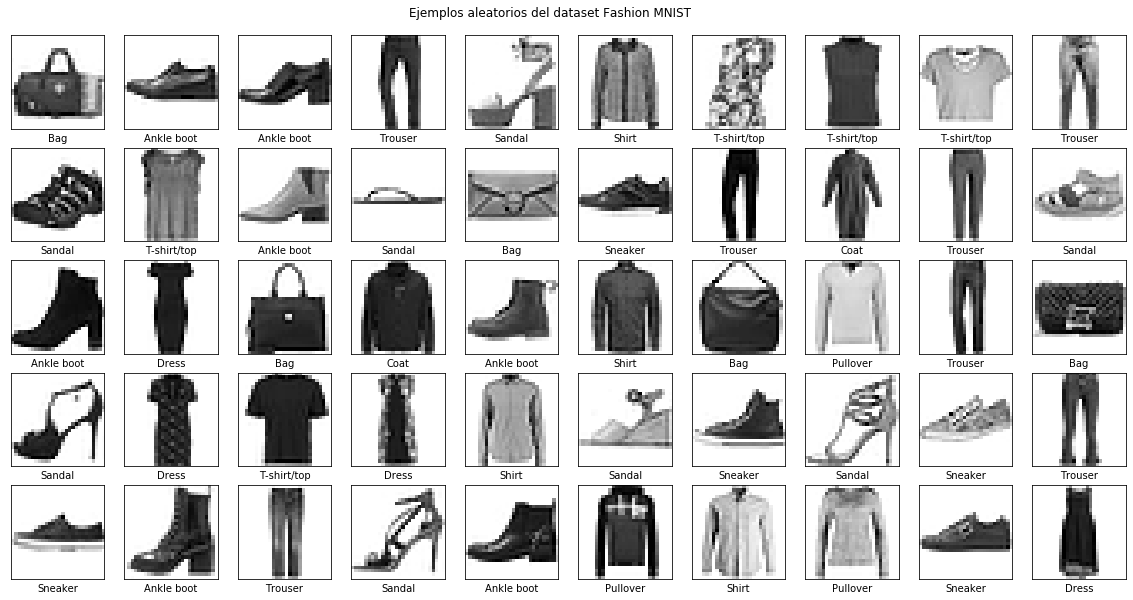

In [5]:
# Visualizamos algunas de las imágenes contenidas en el dataset
plt.figure(figsize=(20, 10))
plt.suptitle('Ejemplos aleatorios del dataset Fashion MNIST', y=0.92)

for i, j in enumerate(np.random.choice(x_train.shape[0], 50)):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[j], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[j]])
plt.show()

Codificamos categóricamente las *labels*.

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Normalizamos las *features*.

In [7]:
x_train = x_train / 255
x_test = x_test / 255

## Eligiendo la cantidad de neuronas ocultas

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout 

Comenzamos explorando un modelo con una capa oculta de 512 neuronas.

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Entrenamos
history = model.fit(x_train, y_train, validation_split=10000/x_train.shape[0],
                    batch_size=32, epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 164us/sample - loss: 0.5095 - accuracy: 0.8174 - val_loss: 0.4088 - val_accuracy: 0.8542
Epoch 2/20
50000/50000 [==============================] - 8s 154us/sample - loss: 0.3827 - accuracy: 0.8626 - val_loss: 0.3917 - val_accuracy: 0.8650
Epoch 3/20
50000/50000 [==============================] - 7s 145us/sample - loss: 0.3536 - accuracy: 0.8765 - val_loss: 0.4839 - val_accuracy: 0.8438
Epoch 4/20
50000/50000 [==============================] - 7s 147us/sample - loss: 0.3387 - accuracy: 0.8828 - val_loss: 0.3824 - val_accuracy: 0.8721
Epoch 5/20
50000/50000 [==============================] - 8s 153us/sample - loss: 0.3252 - accuracy: 0.8895 - val_loss: 0.4078 - val_accuracy: 0.8729
Epoch 6/20
50000/50000 [==============================] - 8s 150us/sample - loss: 0.3166 - accuracy: 0.8919 - val_loss: 0.3961 - val_accuracy: 0.8827
Epoch 7/20
50000/50000 [==========================

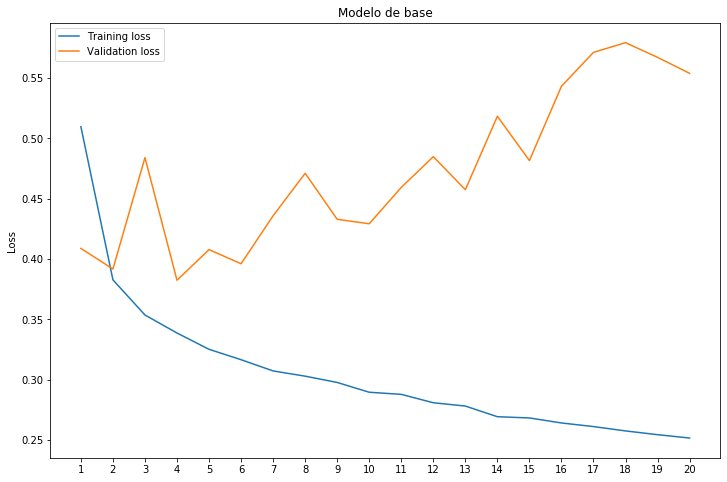

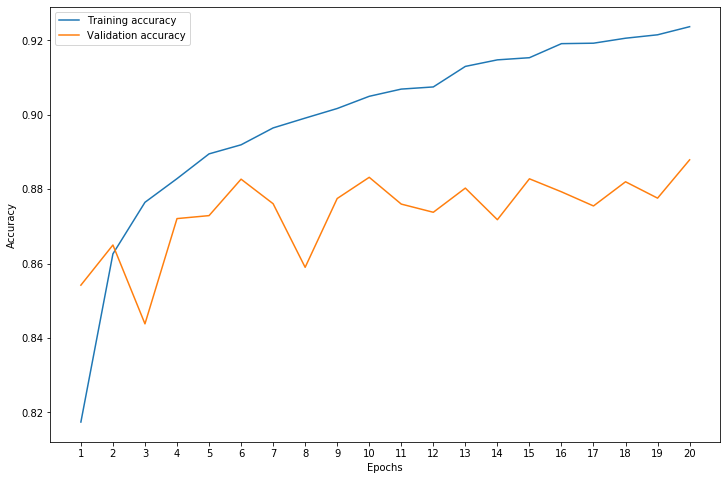

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

> ¿Qué observamos en estas curvas de validación?

Exploremos ahora una red más pequeña, de tan sólo 256 neuronas ocultas.

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entrenamos
history = model.fit(x_train, y_train, validation_split=10000/x_train.shape[0],
                    batch_size=32, epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 116us/sample - loss: 0.5098 - accuracy: 0.8185 - val_loss: 0.4665 - val_accuracy: 0.8295
Epoch 2/20
50000/50000 [==============================] - 6s 114us/sample - loss: 0.3798 - accuracy: 0.8632 - val_loss: 0.4014 - val_accuracy: 0.8627
Epoch 3/20
50000/50000 [==============================] - 6s 112us/sample - loss: 0.3487 - accuracy: 0.8751 - val_loss: 0.3625 - val_accuracy: 0.8710
Epoch 4/20
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3319 - accuracy: 0.8840 - val_loss: 0.3757 - val_accuracy: 0.8726
Epoch 5/20
50000/50000 [==============================] - 5s 109us/sample - loss: 0.3179 - accuracy: 0.8884 - val_loss: 0.3930 - val_accuracy: 0.8758
Epoch 6/20
50000/50000 [==============================] - 6s 112us/sample - loss: 0.3052 - accuracy: 0.8928 - val_loss: 0.3670 - val_accuracy: 0.8810
Epoch 7/20
50000/50000 [==========================

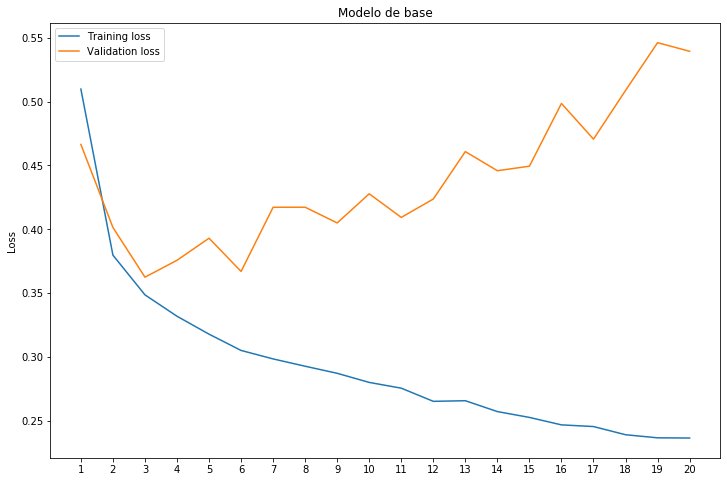

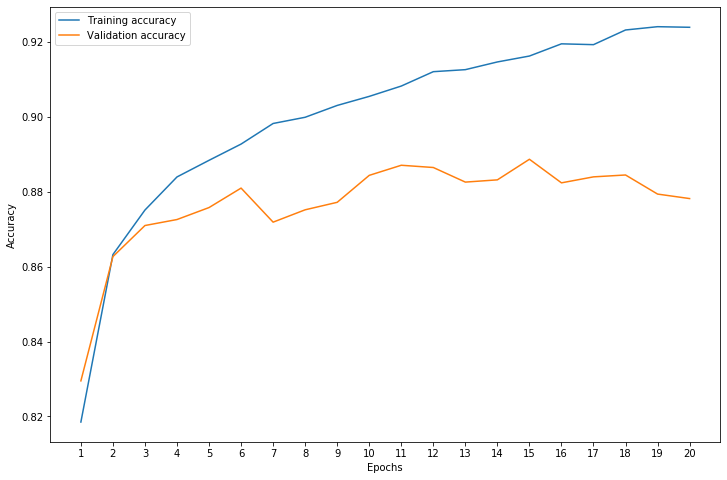

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

> En base a la comparación de estos gráficos con los anteriores, ¿qué modelo eligirías y por qué? ¿Tenemos suficiente información como para tomar una decisión bien fundada?

Para poder hallar una buena arquitectura de red neuronal, debemos hacer múltiples experimentos que nos sirvan para evaluar distintas alternativas de configuración. Aunque Keras no provee herramientas directas para sistematizar esta búsqueda, sí nos permite incorporar las utilidades de Scikit - Learn a través de sus  [*wrappers*](https://keras.io/scikit-learn-api/#wrappers-for-the-scikit-learn-api). Anteriormente. vimos un ejemplo de `KerasRegressor`, el *wrapper* específico para problemas de regresión, y lo utilizamos para hacer *cross - validation*. Ahora vamos a aplicar `KerasClassifier` al problema de clasificación de las imágenes del Fashion MNIST.

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Recordemos que para poder crear una instancia de modelo, estos *wrappers* requieren de una función que se encargue de construir y compilar una red neuronal. Definimos entonces una función que se encarga de esto, donde incluimos un argumento que nos permite variar la cantidad de unidades por capa.

In [18]:
def build_model(train_data=x_train, units=256): # Los argumentos de esta función deben contar con valores por defecto
    
    model = Sequential()
    # La capa Flatten se encarga de aplanar el tensor de entrada
    model.add(Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

Generamos una instancia de la red, especificando al la función que definimos en el argumento `build_fn`. Cualquier argumento propio de la función de construcción también deberá ser aclarado al momento de instanciar el modelo, así como otros *fitting parameters* tales como la cantidad de *epochs*, el tamaño del *batch* o el nivel de verbosidad.

In [19]:
wrapper = KerasClassifier(build_model, batch_size=32, epochs=20, verbose=0)

Importamos `GridSearchCV` del módulo de selección de modelos de Scikit - Learn, definimos la grilla de parámetros a explorar e instanciamos.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'units':[128, 256, 512]}
grid = GridSearchCV(wrapper, params, cv=3)

Incorporamos `EarlyStopping` y `ReduceLROnPlateau`.

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Instanciamos los objetos early_stopping y reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=0)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=0)
callbacks_list = [reduce_lr, early_stopping]

Hacemos el `fit()` al set de train partir de nuestra instancia de `GridSearchCV`.

In [22]:
grid.fit(x_train, y_train, validation_split=0.2,
         batch_size=32, epochs=10,
         callbacks=callbacks_list, verbose=0)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa8601e2190>,
             iid='deprecated', n_jobs=None,
             param_grid={'units': [128, 256, 512]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

Una vez concluida esta búsqueda, podemos conocer cuáles fueron los resultados a partir de distintos argumentos, como `best_score_` y `best_estimator_`.

In [23]:
print(grid.best_score_.round(2))
print('Cantidad de unidades del mejor modelo:', grid.best_estimator_.get_params()['units'])

0.89
Cantidad de unidades del mejor modelo: 512


## Eligiendo la *dropout rate*

Para poder explorar otros valores de hiperparámetros, debemos redefinir la función que construye y compila el modelo de forma de que pueda contemplarlos como argumentos variables. Asimismo, tendremos que extender la grilla de parámetros que `GridSearchCV` se encargará de explorar. Vemos a continuación cómo podemos ampliar nuestra búsqueda incorporando dropout y explorando distintas opciones para la tasa de supresión aleatoria de neuronas durante el entrenamiento.

In [24]:
# Incorporamos dropout a la función que crea y compila la red
def build_model(train_data=x_train, units=256,
                dropout_rate=0.25): # Los argumentos de esta función deben contar con valores por defecto
    
    model = Sequential()
    # La capa Flatten se encarga de aplanar el tensor de entrada
    model.add(Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [25]:
# Creamos una nueva instancia a partir de la función modificada
wrapper = KerasClassifier(build_model, batch_size=32, epochs=20, verbose=0)

In [26]:
# Sumamos dropout_rate al diccionario de hiperparámetros
params = {'units':[128, 256, 512],
          'dropout_rate':[0.1, 0.25, 0.5]}

grid = GridSearchCV(wrapper, params, cv=3)

In [27]:
# Entrenamos
grid.fit(x_train, y_train, validation_split=0.2,
         batch_size=32, epochs=10,
         callbacks=callbacks_list, verbose=0)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa8601e2610>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout_rate': [0.1, 0.25, 0.5],
                         'units': [128, 256, 512]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

> Notemos que incluso trabajando con relativamente pocas combinaciones posibles de hiperparámetros y con una estrategia de *3 fold cross - validation*, la búsqueda exhaustiva se vuelve computacionalmente costosa. Por este motivo, para arquitecturas más complejas y datasets más grandes, esta estrategia resulta muchas veces prohibitiva en la práctica y en su lugar se opta por una estrategia de búsqueda aleatoria con `RandomSearchCV`.

In [28]:
print(grid.best_score_.round(2))
print('Cantidad de unidades del mejor modelo:', grid.best_estimator_.get_params()['units'])
print('Dropout rate:', grid.best_estimator_.get_params()['dropout_rate'])

0.89
Cantidad de unidades del mejor modelo: 512
Dropout rate: 0.25


Habiendo identificado la mejor configuración para nuestro modelo, reentrenamos sobre la totalidad del train set y evaluamos su capacidad de generalización sobre test.

In [29]:
model = build_model(units=grid.best_estimator_.get_params()['units'],
                    dropout_rate=grid.best_estimator_.get_params()['dropout_rate'])

history = model.fit(x_train, y_train, validation_split=10000/x_train.shape[0],
                    batch_size=32, epochs=50,
                    callbacks=callbacks_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 178us/sample - loss: 0.5438 - accuracy: 0.8073 - val_loss: 0.4489 - val_accuracy: 0.8401
Epoch 2/50
50000/50000 [==============================] - 9s 182us/sample - loss: 0.4222 - accuracy: 0.8513 - val_loss: 0.3901 - val_accuracy: 0.8681
Epoch 3/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.3991 - accuracy: 0.8667 - val_loss: 0.4225 - val_accuracy: 0.8627
Epoch 4/50
50000/50000 [==============================] - 8s 168us/sample - loss: 0.3861 - accuracy: 0.8698 - val_loss: 0.4485 - val_accuracy: 0.8569
Epoch 5/50
50000/50000 [==============================] - 9s 184us/sample - loss: 0.3045 - accuracy: 0.8959 - val_loss: 0.3523 - val_accuracy: 0.8886
Epoch 6/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.2934 - accuracy: 0.9003 - val_loss: 0.3492 - val_accuracy: 0.8906
Epoch 7/50
50000/50000 [==========================

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3772 - accuracy: 0.8798


## Ejercicio

Todas las pruebas que hicimos fueron sobre una red simple de una única capa oculta. ¿Podemos mejorar la *performance* del modelo ampliando su capacidad de representación?

Redefiní la función de construcción del modelo para poder variar la cantidad de capas ocultas y explorá distintas cantidades de neuronas para redes con una, dos y tres capas ocultas.